# import 

In [39]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import json, html, re
import numpy as np
from tqdm import tqdm
from glob import glob
from collections import Counter
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
STOPWORDS = thai_stopwords()

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
font_path = '/Users/Nozomi/Library/Fonts/THSarabunNew.ttf'
font_label = fm.FontProperties(fname=font_path,weight='bold',size=25)

def clean(text, hashtag=None):
    if hashtag:
        text = text.replace(hashtag, '')
    text = html.unescape(text)
    text = re.sub(r'http.+?(?:\\s|$)', '', text) # URL link
    text = re.sub(r'[“”„]', '"', text) # convert double quotations into "
    text = re.sub(r'[‘’′′′′`]', "'", text) # convert single quotations into '
    text = re.sub(r'[ \u00a0\xa0\u3000\u2002-\u200a\t\n#]+', ' ', text) # shrink whitespaces e.g. good  boy -> good boy
    text = re.sub(r'[\r\u200b\ufeff]+', '', text) # remove non-breaking space
    text = re.sub(r'ํา','ำ', text) # am
    return text.strip()

def tokenize(text, hashtag=None):
    tokens = word_tokenize(clean(text, hashtag), keep_whitespace='False')
    tokens = [token for token in tokens if token not in STOPWORDS and re.match(r'[ก-๙][ก-๙\\.\\-]+$', token)]
    return tokens

In [13]:
!ls tweets

#16ตุลาไปแยกปทุมวัน.csv
#16ตุลาไปแยกปทุมวัน.json
#25พฤศจิกาไปSCB.csv
#25พฤศจิกาไปSCB.json
#saveวันเฉลิม.csv
#saveวันเฉลิม.json
#ม็อบ25พฤศจิกาทวงคืนสมบัติชาติ.csv
#ม็อบ25พฤศจิกาทวงคืนสมบัติชาติ.json
#ม็อบ2ธันวา.csv
#ม็อบ2ธันวา.json
#ธรรมศาสตร์และการชุมนุม.csv
#ธรรมศาสตร์และการชุมนุม.json
#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ.csv
#เกียมอุดมไม่ก้มหัวให้เผด็จการ.csv
#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ.json
#เกียมอุดมไม่ก้มหัวให้เผด็จการ.json
badstudent_tweet.json
freeyouth_tweet.csv
freeyouth_tweet.json
freeyouth_tweet_raw.csv


In [15]:
filename = 'tweets/freeyouth_tweet.json'
filename = 'tweets/badstudent_tweet.json'
num = 20

# frequent hashtag & cooccurent words

In [16]:
df = pd.read_json(filename, lines=True)

### define duration ###
df = df[(df.date >= '2020-1-1') & (df.date <= '2020-12-31')]

### tokenize ###
df['tokens'] = df.tweet.apply(lambda x: tokenize(x))

##### hashtags #####
hashtag_counter = Counter()
for lst in df.hashtags:
    hashtag_counter.update(lst)
    
hashtag2word = {x[0]:Counter() for x in hashtag_counter.most_common(num)}

# count frequent words
for i, row in df.iterrows():
    for hashtag in row['hashtags']:
        if hashtag in hashtag2word:
            hashtag2word[hashtag].update(row['tokens'])
    
print("|hashtag|count|frequent words|oldest|popular|\n|:-:|:-:|:-:|:-:|:-:|")
for tag, c, in hashtag_counter.most_common(num):
    tempdf = df[df.hashtags.apply(lambda x: tag in x)].sort_values(['created_at'])
    
    ## frequent words
    freqs = " ".join([f"{w}({c})" for w,c in hashtag2word[tag].most_common(10)])
    
    ## oldest
    oldest = tempdf.iloc[0].tweet
    oldest_name = tempdf.iloc[0].username
    oldest_link = tempdf.iloc[0].link
    oldest_date = str(tempdf.iloc[0]['created_at']).split('+')[0]
    
    ## popular
    tempdf = tempdf.sort_values(["retweets_count"], ascending=False)
    popular = tempdf.iloc[0].tweet
    popular_name = tempdf.iloc[0].username
    popular_link = tempdf.iloc[0].link
    popular_date = str(tempdf.iloc[0]['created_at']).split('+')[0]
    retweet_count = tempdf.iloc[0].retweets_count
    
    print(f"|{tag}|{c}|{freqs}|[{oldest_date}]({oldest_link})<br>[@{oldest_name}](https://twitter.com/{oldest_name})<br><br>{oldest.replace('|||','')}|[{popular_date}]({popular_link})<br>[@{popular_name}](https://twitter.com/{popular_name})<br>{retweet_count} retweets<br><br>{popular.replace('|||','')}|")

|hashtag|count|frequent words|oldest|popular|
|:-:|:-:|:-:|:-:|:-:|
|นักเรียนเลว|324|นักเรียน(679) เลว(365) โรงเรียน(280) ครู(136) กระทรวง(63) ม็อบ(53) ทรงผม(50) หนู(47) กระทรวงศึกษาธิการ(43) ผม(42)|[2020-05-29 14:42:50](https://twitter.com/BadStudent_/status/1266273781590319105)<br>[@badstudent_](https://twitter.com/badstudent_)<br><br>ว่าด้วยงานศิลปหัตกรรม  16 พ.ค. (ไม่จัด) ประกาศในที่ประชุมยกเลิกการจัดกิจกรรมงานแข่งขันทั้งหมด  25 พ.ค. (จัด) สพฐ.ประชุมวางแผนจะจัดงานศิปหัตถรรม  28 พ.ค. (ไม่จัด) ศธ.ประกาศเลื่อนจัดงานศิลปหัตถรรม ——— #นักเรียนเลว|[2020-07-03 11:43:31](https://twitter.com/BadStudent_/status/1278912230843510784)<br>[@badstudent_](https://twitter.com/badstudent_)<br>62952 retweets<br><br>Breaking : ด่วนที่สุด!!! ปลัดศธ.ยืนยันแล้ว ทุกโรงเรียนต้องออกกฎทรงผมใหม่ตามระเบียบกระทรวงฯ ปี 63 ห้ามใช้กฎเดิม ย้ำ ห้ามใช้กฎเดิม!! โดยกระทรวงฯ จะส่งหนังสือถึงทุกโรงเรียนเพื่อยืนยันให้ปฏิบัติตามนี้อีกครั้ง —— #นักเรียนเลว #เลิกบังคับหรือจับตัด  https://t.co/2uyN3ywrK2|
|1ธันวาบอกลาเครื่องแบบ

In [17]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tokens
1721,1344589122413813763,1344588986317033472,2020-12-31 17:20:02+07:00,2020-12-31,17:20:02,700,1260519639391416321,badstudent_,นักเรียนเลว,,...,,,,,[],,,,,"[สุดท้าย, ฝาก, ท่อ, น้ำเลี้ยง, นักเรียน, เลว, ..."
1722,1344589115073863681,1344588986317033472,2020-12-31 17:20:00+07:00,2020-12-31,17:20:00,700,1260519639391416321,badstudent_,นักเรียนเลว,,...,,,,,[],,,,,"[เดินทาง, ครึ่ง, ปี, นักเรียน, เลว, ถือกำเนิด,..."
1723,1344589111718412288,1344588986317033472,2020-12-31 17:20:00+07:00,2020-12-31,17:20:00,700,1260519639391416321,badstudent_,นักเรียนเลว,,...,,,,,[],,,,,"[กิจกรรม, สุดท้าย, นักเรียน, เลว, ปี, แคมเปญ, ..."
1724,1344589097524891649,1344588986317033472,2020-12-31 17:19:56+07:00,2020-12-31,17:19:56,700,1260519639391416321,badstudent_,นักเรียนเลว,,...,,,,,[],,,,,"[นักเรียน, ม็อบ, อีกครั้ง, บ๊ายบาย, ไดโนเสาร์,..."
1725,1344589085520789507,1344588986317033472,2020-12-31 17:19:53+07:00,2020-12-31,17:19:53,700,1260519639391416321,badstudent_,นักเรียนเลว,,...,,,,,[],,,,,"[เดือน, ปัญหา, เหมือนเดิม, วิธีการ, เรียกร้อง,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,1261552255188242433,1261552255188242432,2020-05-16 14:01:10+07:00,2020-05-16,14:01:10,700,1260519639391416321,badstudent_,นักเรียนเลว,,...,,,,,[],,,,,"[ผู้ใหญ่, คุย, เด็ก, ชะตากรรม, แน่นอน, สำหรับ,..."
2702,1261505581774336001,1261505581774336000,2020-05-16 10:55:42+07:00,2020-05-16,10:55:42,700,1260519639391416321,badstudent_,นักเรียนเลว,,...,,,,,[],,,,,"[เรียน, ออนไลน์, วันที่, โรงเรียน, วิธี, การเร..."
2703,1261472590062776322,1261472590062776320,2020-05-16 08:44:37+07:00,2020-05-16,08:44:37,700,1260519639391416321,badstudent_,นักเรียนเลว,,...,,,,,[],,,,,"[พื้นที่, ไฟฟ้า, ทีวี, ถึงขนาด, ไวรัส, โอกาส, ..."
2704,1261222039613960193,1261222039613960192,2020-05-15 16:09:01+07:00,2020-05-15,16:09:01,700,1260519639391416321,badstudent_,นักเรียนเลว,,...,,,,,[],,,,,"[ภาระ, งาน, ครู, เป็นเรื่อง, ปกติ, รัฐมนตรี, ศ..."


In [19]:


column = ['date','time','username','tweet','hashtags','link','quote_url','urls','photos','thumbnail','mentions','reply_to','replies_count','retweets_count','likes_count']

df.to_csv(filename.replace('.json','_raw.csv'), index=False)
df[column].to_csv(filename.replace('.json','.csv'), index=False)

# hashtag timeseries

In [22]:
df.date.dt.month

1721    12
1722    12
1723    12
1724    12
1725    12
        ..
2701     5
2702     5
2703     5
2704     5
2705     5
Name: date, Length: 985, dtype: int64

In [27]:
np.ones(5)

array([1., 1., 1., 1., 1.])

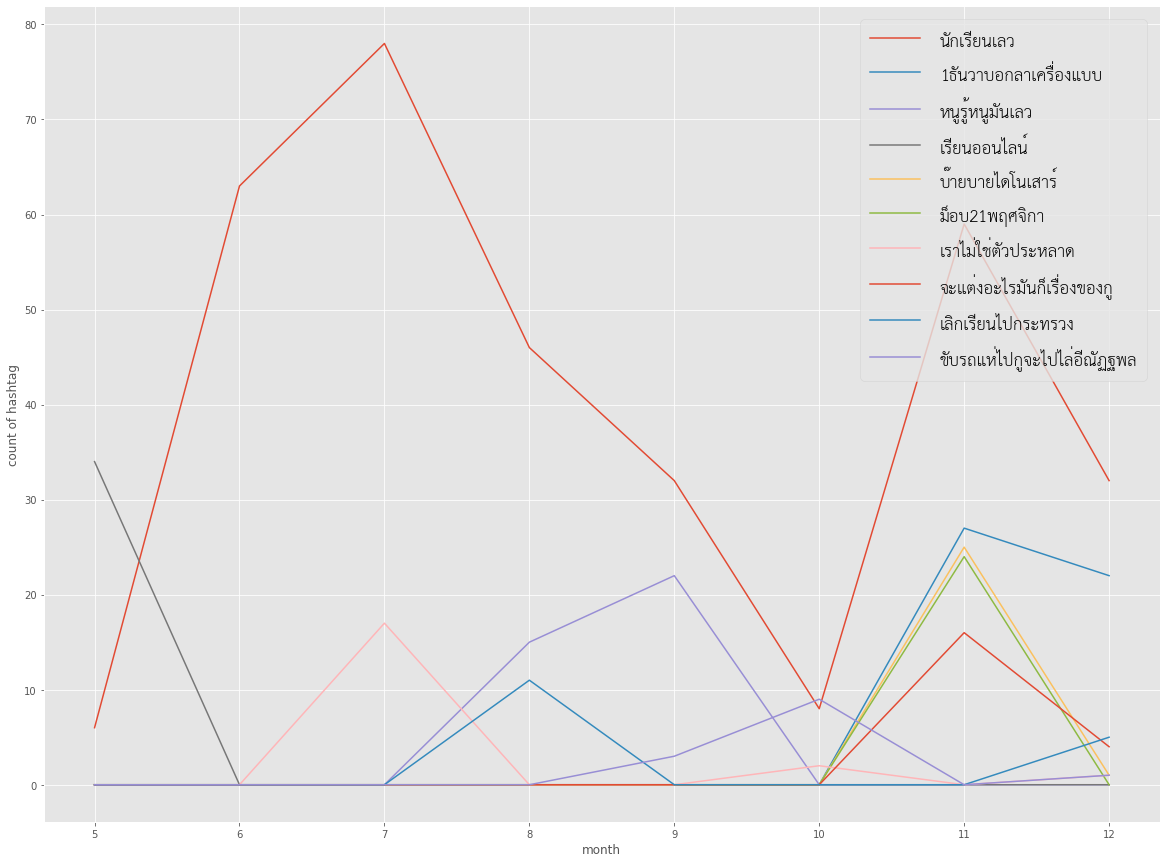

In [41]:
### plot topic time series ###

start_m = 5
xs = list(range(start_m, 13))

fig = plt.figure(figsize=(20,15))

for tag, count in counter.most_common(10):
    counts = []  
    for m in range(start_m, 13):
        count = 0
        thismonth_df = df[df.date.dt.month == m]
        for i, row in thismonth_df.iterrows():
            if tag in row['hashtags']:
                count += 1
        counts.append(count)

    plt.plot(xs, counts, label=tag)

plt.xticks(xs)
plt.legend(prop=font_label)
plt.xlabel('month')
plt.ylabel('count of hashtag')
plt.show()


In [32]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,